In [2]:
from utils import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 40)

## temporal analysis

In [12]:
df = pd.read_parquet(dataset_path + 'BA_complete.parquet')
df.sample(3)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers,beer_id_avg_appearance,beer_id_avg_aroma,beer_id_avg_palate,beer_id_avg_taste,beer_id_avg_overall,beer_id_std,beer_id_std_appearance,beer_id_std_aroma,beer_id_std_palate,beer_id_std_taste,beer_id_std_overall,serving_type_rulebased,polarity,subjectivity,readability_score,user_filtered_nbr_reviews,beer_id_filtered_nbr_reviews,beer_id_filtered_avg,beer_id_filtered_std,beer_id_filtered_avg_appearance,beer_id_filtered_avg_aroma,beer_id_filtered_avg_palate,beer_id_filtered_avg_taste,beer_id_filtered_avg_overall,beer_id_filtered_std_appearance,beer_id_filtered_std_aroma,beer_id_filtered_std_palate,beer_id_filtered_std_taste,beer_id_filtered_std_overall,user_country,user_subregion,user_US_state,beer_group
1050698,2559,388,Lambic - Unblended,1206356400,sacodetoro.19384,4.0,4.50,4.50,4.5,4.0,4.37,On tap at Falling Rock.Poured a bril...,857,320,3.90,5.0,232,232,1.116238e+09,"United States, California",Belgium,82,3.742138,4.021226,3.632862,3.918239,3.867925,0.657588,0.510475,0.497769,0.721622,0.566547,0.657588,draft,0.274250,0.599917,77.94,138,191,3.928586,0.431413,3.746073,4.037958,3.650524,3.965969,3.914921,0.489008,0.497559,0.710300,0.509922,0.589067,United States of America,Northern America,California,Sour Beers
302573,93324,396,Belgian Strong Dark Ale,1368093600,hophead84.109437,3.5,4.25,4.25,4.0,4.0,4.06,04/26/2013On tap at Alesmith.A: Dark...,65,11,3.87,10.0,2942,2241,1.164798e+09,"United States, California","United States, California",288,3.722222,3.944444,3.888889,3.833333,3.833333,0.279508,0.618017,0.390868,0.377308,0.306186,0.279508,draft,0.253284,0.553333,78.25,1570,7,3.811429,0.299412,3.535714,3.928571,3.821429,3.785714,3.785714,0.528925,0.426084,0.345033,0.303746,0.267261,United States of America,Northern America,California,Strong Ales
168349,658,184,Tripel,1312624800,spcoly.375520,4.0,3.50,3.50,3.5,3.5,3.53,recommended by store manager as one ...,981,471,3.91,8.0,36,33,1.254218e+09,"United States, Illinois",Netherlands,20,3.883833,3.847966,3.851713,3.906852,3.870450,0.541788,0.493271,0.479361,0.533067,0.513128,0.541788,bottle,0.047899,0.580602,45.93,17,193,3.853938,0.433776,3.840674,3.836788,3.792746,3.892487,3.830311,0.489011,0.488054,0.577733,0.515800,0.537065,United States of America,Northern America,Illinois,Historical and Traditional Beers


In [21]:
# add column with review date
df['review_date'] = pd.to_datetime(df['date'], unit='s')

# extract year and month from review date
df['review_year'] = df['review_date'].dt.year
df['review_month'] = df['review_date'].dt.month

# drop column review date
df.drop(columns=['review_date'], inplace=True)

df[['date', 'review_year', 'review_month']].sample(3)

,date,review_year,review_month
968383,1441706400,2015,9
602946,1317636000,2011,10
559937,1258196400,2009,11


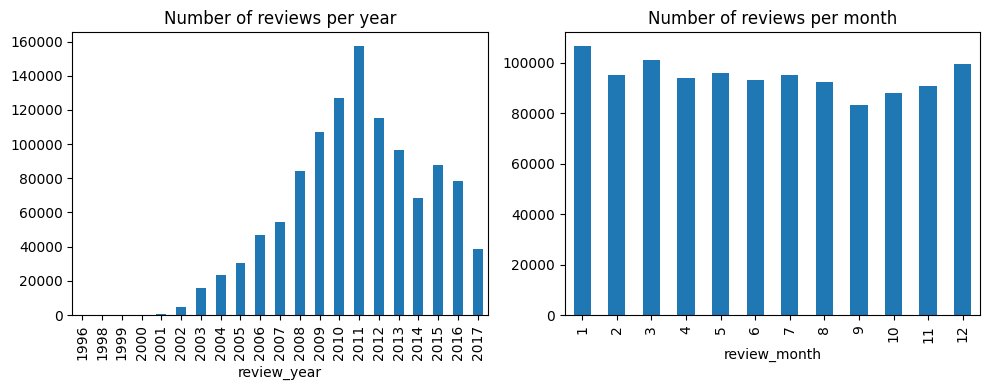

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# show the number of reviews per year
df.review_year.value_counts().sort_index().plot(kind='bar', title='Number of reviews per year', ax=axes[0])

# show the number of reviews per month
df.review_month.value_counts().sort_index().plot(kind='bar', title='Number of reviews per month', ax=axes[1])

plt.tight_layout()
plt.show()

In [32]:
# add column with user_joined date
df['user_joined__date'] = pd.to_datetime(df['user_joined'], unit='s')

# extract year and month from user_joined date
df['user_joined_year'] = df['user_joined__date'].dt.year
df['user_joined_month'] = df['user_joined__date'].dt.month

# drop column user_joined date
df.drop(columns=['user_joined__date'], inplace=True)

df[['date', 'user_joined_year', 'user_joined_month']].sample(3)

,date,user_joined_year,user_joined_month
356744,1331636400,2007,10
510339,1367143200,2009,3
403159,1418986800,2010,7


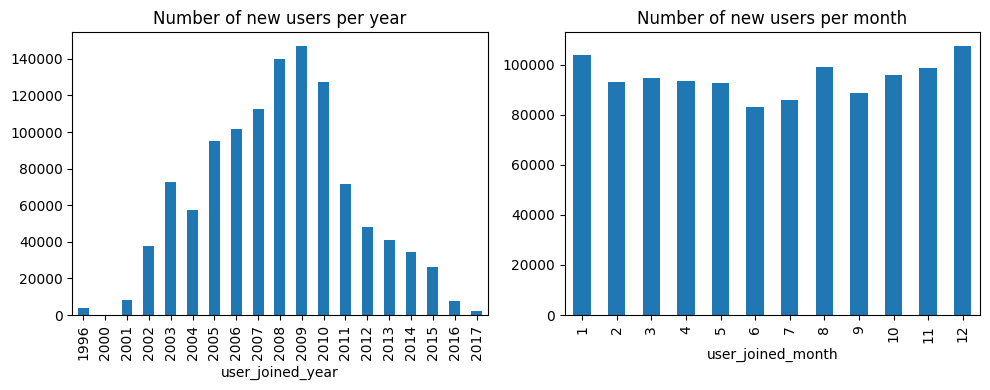

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# show the number of new users per year
df.user_joined_year.value_counts().sort_index().plot(kind='bar', title='Number of new users per year', ax=axes[0])

# show the number of new users per month
df.user_joined_month.value_counts().sort_index().plot(kind='bar', title='Number of new users per month', ax=axes[1])

plt.tight_layout()
plt.show()

## stat test

### Is there a difference in ratings between the serving types ?

In [50]:
df = pd.read_parquet(dataset_path + 'BA_04_complete.parquet')

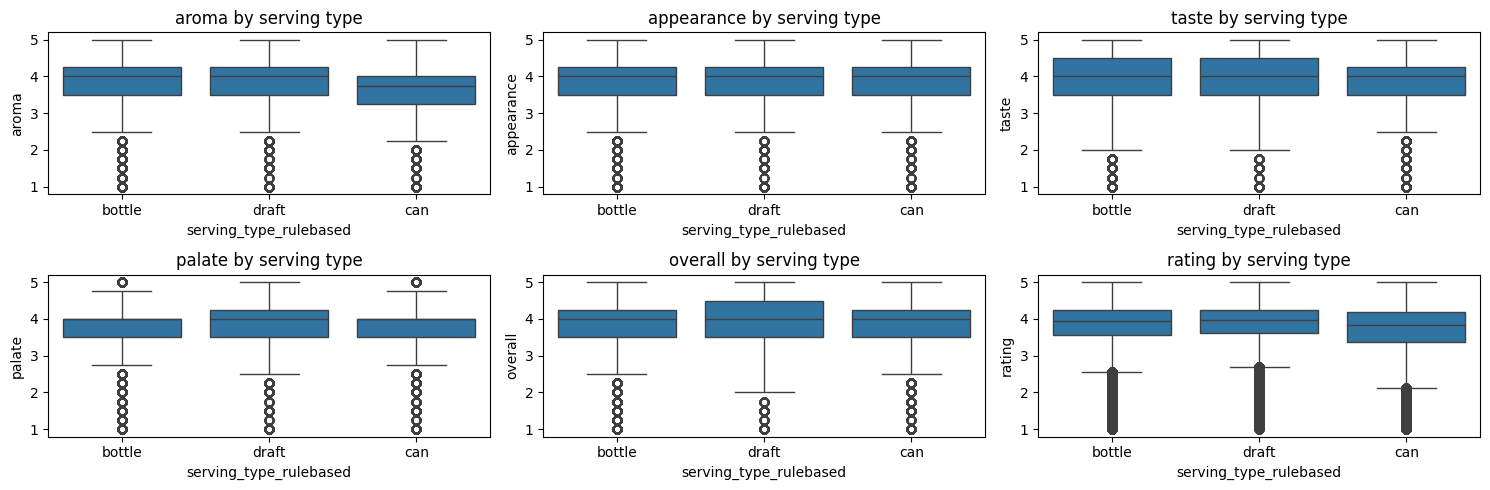

In [61]:
# Define the aspects and serving types
aspects = ['aroma', 'appearance', 'taste', 'palate', 'overall', 'rating']
serving_types = ['bottle', 'can', 'draft']

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

# Iterate over the aspects and serving types
for i, aspect in enumerate(aspects):
    row = i // 3
    col = i % 3
    
    # Plot the boxplot for the current aspect and serving type
    sns.boxplot(x='serving_type_rulebased', y=aspect, data=df, ax=axes[row, col])
    axes[row, col].set_title(aspect + ' by serving type')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [65]:
from scipy.stats import f_oneway
# perform a one-way ANOVA test for each aspect using f_oneway() function

# Define the aspects and serving types
aspects = ['aroma', 'appearance', 'taste', 'palate', 'overall', 'rating']
serving_types = ['bottle', 'can', 'draft']

# Iterate over the aspects

for aspect in aspects:
    # Create list of lists containing the slices
    slices = [df[df['serving_type_rulebased'] == st][aspect] for st in serving_types]
    
    # Perform the ANOVA
    f, p = f_oneway(*slices)
    print('Aspect:', aspect, 'F-statistic:', f, 'p-value:', p)
    
print('Since all p-values are less than 0.05, we can reject the null hypothesis that the means of all groups are equal.')

Aspect: aroma F-statistic: 2791.256706534959 p-value: 0.0
Aspect: appearance F-statistic: 1542.7931664933215 p-value: 0.0
Aspect: taste F-statistic: 3200.0850402371143 p-value: 0.0
Aspect: palate F-statistic: 2396.265573610772 p-value: 0.0
Aspect: overall F-statistic: 2830.2149370188417 p-value: 0.0
Aspect: rating F-statistic: 3393.2173203993225 p-value: 0.0
Since all p-values are less than 0.05, we can reject the null hypothesis that the means of all groups are equal.


> There is a statistically significant difference in ratings between the serving types (p < 0.05). Now, does that mean that the serving type changes the way people rate their beer ? Not necessarly, there can be other covariates that influence the ratings.

### Does the serving type influence the ratings of the beers ?

> By comparing specific beers that have a sufficient amount of reviews for each serving style, we can evaluate the importance of the serving style on the ratings. 

In [46]:
df = pd.read_parquet(dataset_path + 'BA_04_complete.parquet')

In [47]:
# count the number of reviews for each serving type per beer
df_match = df.groupby(['beer_id', 'serving_type_rulebased']).size().unstack().reset_index()
df_match.columns = ['beer_id', 'bottle', 'can', 'draft']
df_match.fillna(0, inplace=True)
df_match[['bottle', 'can', 'draft']] = df_match[['bottle', 'can', 'draft']].astype(int)

# keep only beer that have at least n reviews for each serving type
n = 20
df_match = df_match[(df_match['bottle'] >= n) & (df_match['can'] >= n) & (df_match['draft'] >= n)].copy(deep=True)

display(df_match.sample(3))
print('Shape of df_match:', df_match.shape)
print('There are {} beers that have at least {} reviews for each serving type'.format(df_match.shape[0], n))

,beer_id,bottle,can,draft
371,429,474,73,136
7574,11757,1309,22,261
1080,1331,138,345,151


Shape of df_match: (91, 4)
There are 91 beers that have at least 20 reviews for each serving type


In [48]:
# keep only beer that have at least n reviews for each serving type
df = df[df['beer_id'].isin(df_match['beer_id'])].copy(deep=True)

# for each beer_id, keep only n random reviews for each serving type
df = df.groupby(['beer_id', 'serving_type_rulebased']).apply(lambda x: x.sample(n=n)).reset_index(drop=True)
display(df.sample(3))
print('Shape of df:', df.shape)
print('We have {} reviews for each beer_id, {} for each serving type'.format(3*n, n))

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,brewery_location,brewery_nbr_beers,beer_id_avg_appearance,beer_id_avg_aroma,beer_id_avg_palate,beer_id_avg_taste,beer_id_avg_overall,beer_id_avg_rating,beer_id_std_appearance,beer_id_std_aroma,beer_id_std_palate,beer_id_std_taste,beer_id_std_overall,beer_id_std_rating,serving_type_rulebased,polarity,user_filtered_nbr_reviews,beer_id_filtered_nbr_reviews,beer_id_filtered_avg_appearance,beer_id_filtered_avg_aroma,beer_id_filtered_avg_palate,beer_id_filtered_avg_taste,beer_id_filtered_avg_overall,beer_id_filtered_avg_rating,beer_id_filtered_std_appearance,beer_id_filtered_std_aroma,beer_id_filtered_std_palate,beer_id_filtered_std_taste,beer_id_filtered_std_overall,beer_id_filtered_std_rating,user_country,user_subregion,user_US_state,beer_group
584,276,140,American Pale Ale (APA),1153562400,miscusi.14610,4.5,4.0,4.0,4.5,4.5,4.33,3/14/07(On tap at the Flying Pig Pub...,11268,3023,4.05,5.6,596,595,1.108206e+09,"United States, California",574,4.016159,3.923058,3.991962,4.103567,4.212743,4.066082,0.440623,0.482051,0.467784,0.497619,0.525176,0.404083,draft,0.230029,372,1182,4.030668,3.901650,3.982234,4.110195,4.222716,4.065499,0.450750,0.487680,0.467058,0.492715,0.518545,0.401224,United States of America,Northern America,California,Ales
3340,8919,2681,American Double / Imperial IPA,1265367600,aerozeppl.101084,4.5,4.0,4.5,4.0,4.5,4.18,$8.99 for the growler fill.A: Classi...,3986,1367,4.10,8.7,1220,1189,1.159870e+09,"United States, Colorado",337,4.112500,4.100551,4.050551,4.114706,4.091360,4.100434,0.409070,0.459598,0.461814,0.473725,0.495351,0.369867,draft,0.397333,587,610,4.129098,4.110656,4.078689,4.150820,4.125410,4.127836,0.413287,0.457165,0.447072,0.457782,0.489263,0.355762,United States of America,Northern America,New York,Strong Ales
3545,11757,1199,American Double / Imperial Stout,1316426400,bunzilla.552688,5.0,5.0,5.0,5.0,5.0,5.00,12oz bottle poured into a snifferApp...,16509,3811,4.47,8.3,1089,62,1.295003e+09,"United States, Michigan",399,4.390366,4.438602,4.413282,4.516569,4.417424,4.460732,0.426841,0.430697,0.459932,0.434872,0.457126,0.353013,bottle,0.275031,54,1592,4.389604,4.430276,4.418656,4.513348,4.417557,4.457839,0.423823,0.422505,0.451595,0.436422,0.456459,0.350783,United States of America,Northern America,Indiana,Stouts


Shape of df: (5460, 53)
We have 60 reviews for each beer_id, 20 for each serving type


In [49]:
from scipy.stats import f_oneway

aspects = ['aroma', 'appearance', 'palate', 'taste', 'overall', 'rating']
above_threshold = []
below_threshold = []

for aspect in aspects:
    above = 0
    below = 0
    
    for beer_id in tqdm(set(df['beer_id'])):
        # Filter the DataFrame for the specified beer ID
        filtered_df_specific = df[df['beer_id'] == beer_id]

        # Perform the one-way ANOVA test
        result = f_oneway(filtered_df_specific[filtered_df_specific['serving_type_rulebased'] == 'bottle'][aspect],
                          filtered_df_specific[filtered_df_specific['serving_type_rulebased'] == 'can'][aspect],
                          filtered_df_specific[filtered_df_specific['serving_type_rulebased'] == 'draft'][aspect])

        if result.pvalue < 0.05:
            above += 1
        else:
            below += 1
    
    above_threshold.append(above)
    below_threshold.append(below)
    print(f'The percentage of beers where the {aspect} is significantly different between serving types is {round(above / (above + below) * 100, 2)}%.\n')

100%|██████████| 91/91 [00:00<00:00, 1525.35it/s]


The percentage of beers where the aroma is significantly different between serving types is 8.79%.



100%|██████████| 91/91 [00:00<00:00, 1957.12it/s]


The percentage of beers where the appearance is significantly different between serving types is 9.89%.



100%|██████████| 91/91 [00:00<00:00, 1424.03it/s]


The percentage of beers where the palate is significantly different between serving types is 5.49%.



100%|██████████| 91/91 [00:00<00:00, 1598.59it/s]


The percentage of beers where the taste is significantly different between serving types is 9.89%.



100%|██████████| 91/91 [00:00<00:00, 2209.16it/s]


The percentage of beers where the overall is significantly different between serving types is 6.59%.



100%|██████████| 91/91 [00:00<00:00, 2100.06it/s]

The percentage of beers where the rating is significantly different between serving types is 10.99%.



> Only a small amount of beers have different ratings for different serving styles. It seems like the serving type is not the only factor that influences the ratings !